In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load the data
df = pd.read_excel('anscombes blog.xlsx')
print(df)

     X      Y  X.1   Y.1  X.2    Y.2  X.3    Y.3
0   10   8.04   10  9.14   10   7.46    8   6.58
1    8   6.95    8  8.14    8   6.77    8   5.76
2   13   7.58   13  8.74   13  12.74    8   7.71
3    9   8.81    9  8.77    9   7.11    8   8.84
4   11   8.33   11  9.26   11   7.81    8   8.47
5   14   9.96   14  8.10   14   8.84    8   7.04
6    6   7.24    6  6.13    6   6.08    8   5.25
7    4   4.26    4  3.10    4   5.39   19  12.50
8   12  10.84   12  9.13   12   8.15    8   5.56
9    7   4.82    7  7.26    7   6.42    8   7.91
10   5   5.68    5  4.74    5   5.73    8   6.89


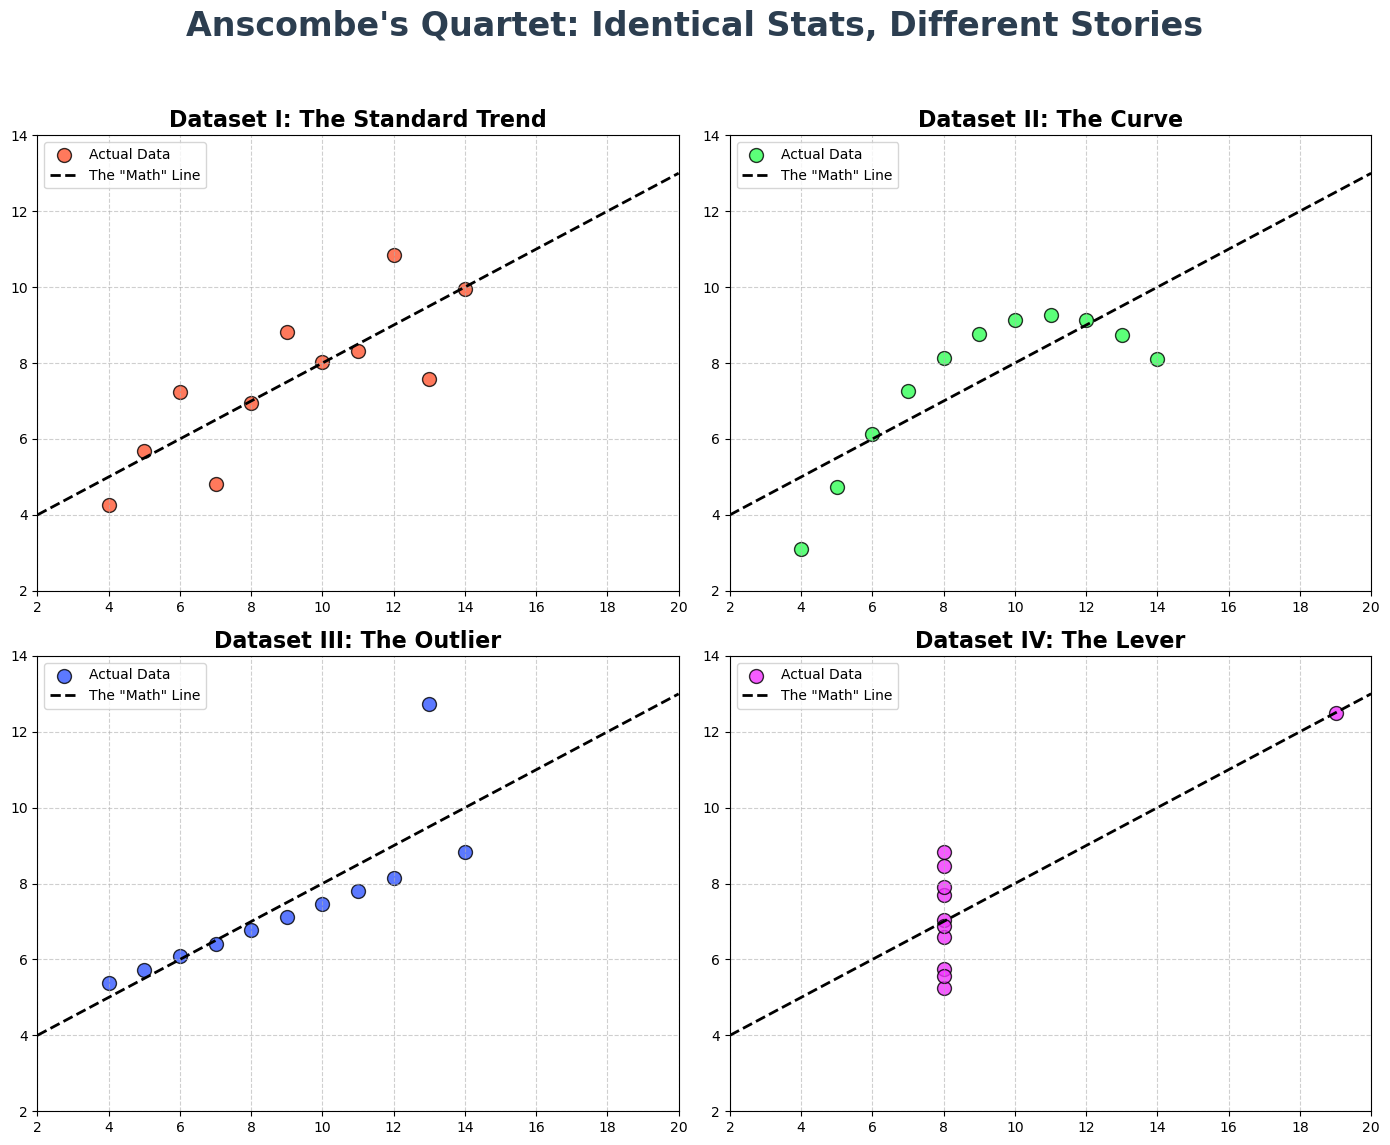

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. Load and clean the data
df = pd.read_excel('anscombes blog.xlsx')
df = df.iloc[:11].copy()

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

datasets = [
    (df['X'], df['Y']), (df['X.1'], df['Y.1']),
    (df['X.2'], df['Y.2']), (df['X.3'], df['Y.3'])
]

# 2. Setup the "Sheet" (2 rows, 2 columns)
# Size (14, 12) ensures it fits well on a screen or a printed page
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

colors = ['#FF5733', '#33FF57', '#3357FF', '#F333FF'] # Bright, blog-friendly colors
titles = ['Dataset I: The Standard Trend', 'Dataset II: The Curve', 
          'Dataset III: The Outlier', 'Dataset IV: The Lever']

# 3. Plot each dataset
for i, (x, y) in enumerate(datasets):
    ax = axes[i // 2, i % 2]
    
    # Calculate the line for the "Identical Twin" effect
    slope, intercept, r_val, _, _ = stats.linregress(x, y)
    line_x = np.array([2, 20])
    line_y = intercept + slope * line_x
    
    # Add elements to the plot
    ax.scatter(x, y, color=colors[i], s=100, edgecolor='black', alpha=0.8, label='Actual Data')
    ax.plot(line_x, line_y, color='black', linestyle='--', linewidth=2, label='The "Math" Line')
    
    # Styling each chart
    ax.set_title(titles[i], fontsize=16, fontweight='bold')
    ax.set_xlim(2, 20)
    ax.set_ylim(2, 14)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

# 4. Add the "Sheet" title to tie it all together
plt.suptitle("Anscombe's Quartet: Identical Stats, Different Stories", 
             fontsize=24, fontweight='bold', color='#2c3e50', y=0.98)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('anscombes_single_sheet.png', dpi=300) # High resolution for your blog

In [5]:
# Ensure all columns are numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Define the four pairs of datasets
datasets = [
    (df['X'], df['Y'], 'Dataset I'),
    (df['X.1'], df['Y.1'], 'Dataset II'),
    (df['X.2'], df['Y.2'], 'Dataset III'),
    (df['X.3'], df['Y.3'], 'Dataset IV')
]

# 4. Calculate the Statistics
results = []
for x, y, name in datasets:
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    results.append({
        'Dataset': name,
        'Mean of X': round(x.mean(), 2),
        'Mean of Y': round(y.mean(), 2),
        'Variance of X': round(x.var(), 2),
        'Variance of Y': round(y.var(), 2),
        'Correlation': round(r_value, 3),
        'Regression Line': f"y = {intercept:.2f} + {slope:.2f}x"
    })

# 5. Create a clean Summary Table
stats_summary = pd.DataFrame(results)

# Display the output
print("--- Anscombe's Quartet: Statistical Summary ---")
print(stats_summary.to_string(index=False))

# Save to CSV for easy use in the blog
stats_summary.to_csv('anscombes_stats_only.csv', index=False)

--- Anscombe's Quartet: Statistical Summary ---
    Dataset  Mean of X  Mean of Y  Variance of X  Variance of Y  Correlation  Regression Line
  Dataset I        9.0        7.5           11.0           4.13        0.816 y = 3.00 + 0.50x
 Dataset II        9.0        7.5           11.0           4.13        0.816 y = 3.00 + 0.50x
Dataset III        9.0        7.5           11.0           4.12        0.816 y = 3.00 + 0.50x
 Dataset IV        9.0        7.5           11.0           4.12        0.817 y = 3.00 + 0.50x
